# **Fashion MNIST Image Classification using CNNs**

In this application, we will continue to work on the Fashion MNIST dataset and will try to figure out how CNNs are applied to the image data.

Here, we will create a simple model with only a limited set of features and talk about the architecture. Please feel free to add/modify the architecture as per your understanding.

## **Importing libraries and loading the data**

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
(X_train, trainY), (X_test, testY) = tf.keras.datasets.fashion_mnist.load_data()
X_train.shape, trainY.shape, X_test.shape, testY.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## **Visualizing the data**

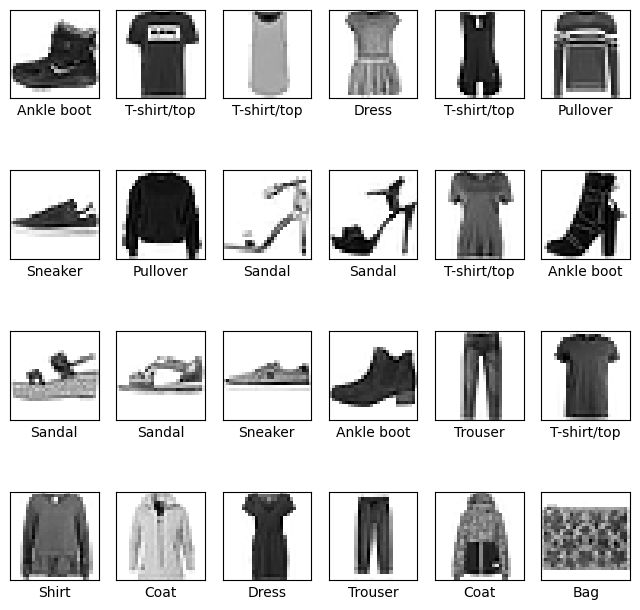

In [3]:
# Let's visualize the dataset

import matplotlib.pyplot as plt
class_names_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize = (8, 8))

for i in range(24):
    plt.subplot(4, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(class_names_list[trainY[i]])
plt.show()

## **Data Preprocessing**

In [4]:
# Let's normalize the dataset. Since there are pixel values ranging from 0-255, divide by 255 to get the new ranges from 0-1

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Also, we will create one-hot encoded vectors for the target variable
y_train = tf.keras.utils.to_categorical(trainY)
y_test = tf.keras.utils.to_categorical(testY)

## **Model Building**

In [5]:
# Importing the libraries as required. Note that we are using tensorflow.keras
import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Initiating the sequential model object
model = Sequential()

# Generating the model and adding layers
# Two convolution layers and a max-pooling layer
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding = 'same', data_format = 'channels_last', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding = 'same', data_format = 'channels_last'))

model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the data and making room for the fully connected component
model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation = 'softmax'))

In [6]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                200768    
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                          

**Observations:**

- The model structure has:
  - 2 convolution layers with 16 filters each of size (3, 3) and 'same' padding i.e. the output would be of same size as the input except the depth which would be equal to 16.
  - Max pooling of size (2, 2) is applied on the output of the second layer.
  - The output of max pooled images is flattened using the Flatten layer.
  - A Dense layer is used to create a fully connected layer with 64 nodes has been applied to the output of the Flatten layer
  - A batch normalization layer to normalize each batch while training the model i.e. centering and scaling each batch separately. It helps to make the training process faster, reduce overfitting so that the model can generalize appropriately.
  - Again, a Dense layer with 16 nodes and a batch normalization layer
  - Finally, the softmax layer with 10 nodes to get the probabilities of each observation belonging to each class.
- Each node in the batch normalization layer has two non-trainable parameters - mean and variance. Here, we have 2 batch normalization layers with 64 and 16 nodes. So, the model has (64 + 16) * 2 = 160 non-trainable parameters.

## **Compiling, fitting and evaluating the test set prediction**

In [7]:
# Reshaping the training and the testing data
# This needs to be reshaped because the input of CNNs must be a 4-D array.

x_train = X_train.reshape(60000, 28, 28, 1)
x_test = X_test.reshape(10000, 28, 28, 1)

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
# Optimizer for the model, Adam with a learning rate (lr) of 0.01
optimizer = Adam(learning_rate = 0.01)

# Compile the model with the optimizer, loss (categorical_crossentropy) and the metric (accuracy) to look at
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [9]:
# Fitting the model with a batch size of 128 and 10 epochs.
model.fit(x_train, y_train, validation_data = (x_test, y_test), verbose = 1, batch_size = 128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 91s 187ms/step - loss: 0.4074 - accuracy: 0.8585 - val_loss: 0.3396 - val_accuracy: 0.8827
Epoch 2/10
469/469 [==============================] - 80s 171ms/step - loss: 0.2679 - accuracy: 0.9024 - val_loss: 0.3454 - val_accuracy: 0.8761
Epoch 3/10
469/469 [==============================] - 78s 165ms/step - loss: 0.2290 - accuracy: 0.9161 - val_loss: 0.2835 - val_accuracy: 0.8983
Epoch 4/10
469/469 [==============================] - 78s 166ms/step - loss: 0.2054 - accuracy: 0.9247 - val_loss: 0.2867 - val_accuracy: 0.9005
Epoch 5/10
469/469 [==============================] - 77s 164ms/step - loss: 0.1846 - accuracy: 0.9317 - val_loss: 0.2667 - val_accuracy: 0.9093
Epoch 6/10
469/469 [==============================] - 77s 165ms/step - loss: 0.1679 - accuracy: 0.9380 - val_loss: 0.2480 - val_accuracy: 0.9149
Epoch 7/10
469/469 [==============================] - 78s 165ms/step - loss: 0.1537 - accuracy: 0.9431 - val_loss: 0.2614 - val_ac

- The training accuracy is about 95% and the validation accuracy is about 90%.

## Evaluate the model on the test set

- Let's predict using the test data.
- The .predict() method in Keras models returns the probabilities of each observation belonging to each class. We will choose the class with the highest predicted probability.
- Also, let's build a function to print the classification report and confusion matrix.

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = class_names_list, yticklabels = class_names_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

313/313 [==============================] - 5s 16ms/step
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1000
           1       0.99      0.99      0.99      1000
           2       0.86      0.82      0.84      1000
           3       0.92      0.90      0.91      1000
           4       0.84      0.85      0.84      1000
           5       0.96      0.99      0.97      1000
           6       0.68      0.82      0.74      1000
           7       0.96      0.95      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



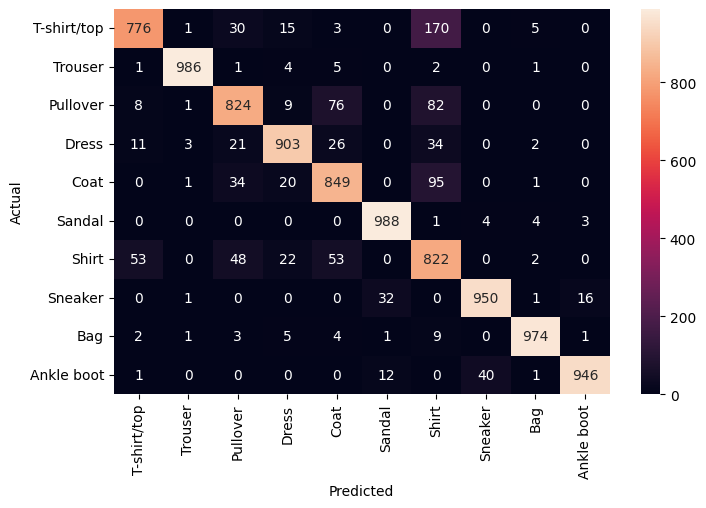

In [12]:
test_pred = np.argmax(model.predict(x_test), axis = -1)

metrics_score(testY, test_pred)

**Observations:**
- Class 6 (Shirt) has a poor recall rate. Only about 72% of the relevant shirt images were classified as shirts.
- Classes 1 (Trouser), 5 (Sandal), and 8 (Bag), on the other hand, have the highest f1-score.
- Overall, the model is performing well with an accuracy of about 90%.
- There is a hint of overfitting in the modeling process. We can use regularization, dropout, batch normalization, and data augmentation to handle it. Feel free to apply these techniques to this dataset.

Let's visualize the images from the test data.
- We will randomly select 24 images from the test data and visualize them.
- The title of each image would show the actual and predicted label of that image and the probability of the predicted class.
- Higher the probability more confident the model is about the prediction.

313/313 [==============================] - 5s 15ms/step


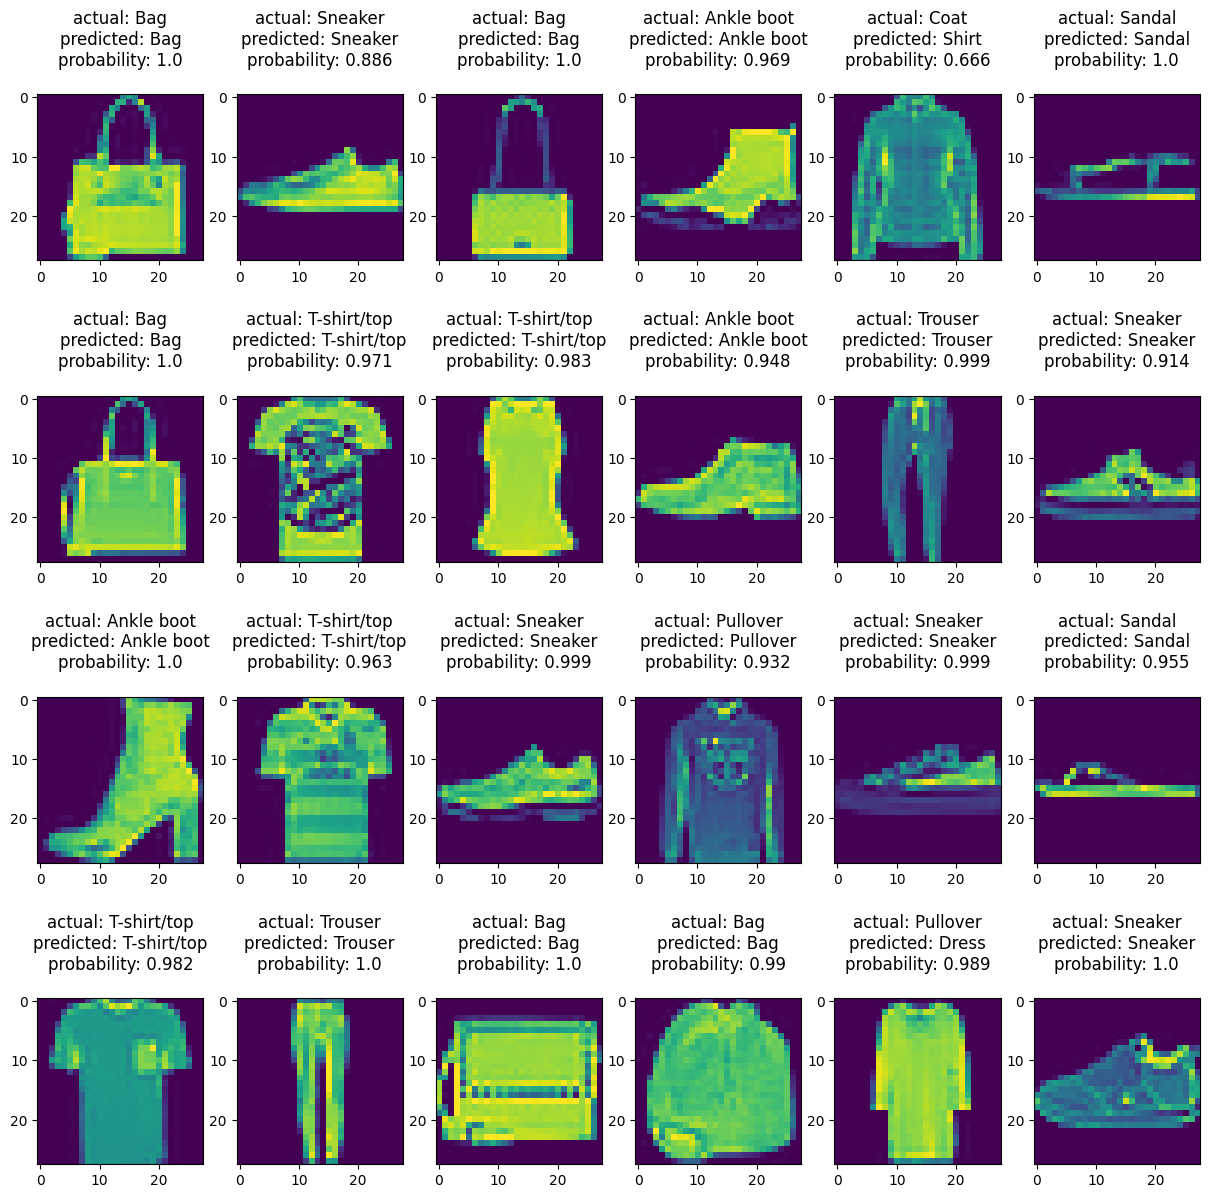

In [13]:
rows = 4
cols = 6

fig = plt.figure(figsize = (15, 15))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(testY))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_test[random_index, :])
        pred_label = class_names_list[test_pred[random_index]]
        true_label = class_names_list[testY[random_index]]
        y_pred_test_max_probas = np.max(model.predict(x_test), axis = -1)
        pred_proba = y_pred_test_max_probas[random_index]
        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()

## **Conclusion and Recommendations**

**Conclusion:**
- We observed that the model is slightly overfitting the training data.
 - To avoid overfitting, we can try out dropout layers.
- Note the shape of the training and the testing data for the fitting process. Data should be properly shaped when sending in volumes in the first layer of CNNs.
- To get better accuracies, one can try to add more convolutional filters, more convolutional, and dense layers. However, adding more nodes also increases the time required to fit the model, and hence there is a trade-off.
 - In such a case, batch normalization comes in handy. It can speed up the training process.

**Recommendations:**
 - Play around with hyperparameters and see if you can improve the accuracy.
 - Try out different optimizers and assess their effectiveness.
 - Also, try out the initializers to check their effect on the model building process.